In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score

In [28]:
raw = pd.read_csv('../data/raw/chemistry.csv')
raw.head()

,sex,age,address,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,activities,higher,health,absences,M1,M2,M3
0,F,18,U,4,4,at_home,teacher,2,2,0,no,yes,3,6,25,30,30
1,F,17,U,1,1,at_home,other,1,2,0,no,yes,3,4,25,25,30
2,F,15,U,1,1,at_home,other,1,2,3,no,yes,3,10,35,40,50
3,F,15,U,4,2,health,services,1,3,0,yes,yes,5,2,75,70,75
4,F,16,U,3,3,other,other,1,2,0,no,yes,5,4,30,50,50


In [3]:
num_cat = ['M1', 'M2', 'M3']
one_hot_cat = ['sex', 'address', 'Mjob', 'Fjob', 'activities', 'higher']

encoder = LabelEncoder()

for column in raw[one_hot_cat]:
    raw[column] = encoder.fit_transform(raw[column].values)
    
for i, row in raw.iterrows():
    if row['M1'] < 20:
        raw['M1'][i] = 0
    elif 20<=row['M1']<70:
        raw['M1'][i] = 1
    else:
        raw['M1'][i] = 2
        
    if row['M2'] < 20:
        raw['M2'][i] = 0
    elif 20<=row['M2']<70:
        raw['M2'][i] = 1
    else:
        raw['M2'][i] = 2
        
    if row['M3'] < 20:
        raw['M3'][i] = 0
    elif 20<=row['M3']<70:
        raw['M3'][i] = 1
    else:
        raw['M3'][i] = 2


In [4]:
raw.head()
transformed_data = raw.copy()

In [5]:
transformed_data.columns.values

array(['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'traveltime', 'studytime', 'failures', 'activities', 'higher',
       'health', 'absences', 'M1', 'M2', 'M3'], dtype=object)

In [6]:
x = transformed_data.drop('M3', axis=1)
y = transformed_data['M3']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [8]:
clf = Pipeline([
    ('reduce_dim', SelectKBest(chi2, k=2)),
    ('train', LinearSVC(C=100))
])

scores = cross_val_score(clf, x_train, y_train, cv=5, n_jobs=2)
print(f"Mean model accuracy: {np.array(scores).mean()}")

a = clf.fit(x_train, y_train)
print("a: ",a)

Mean model accuracy: 0.6109604519774011
a:  Pipeline(memory=None,
     steps=[('reduce_dim', SelectKBest(k=2, score_func=<function chi2 at 0x7f742b4312f0>)), ('train', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])


/home/ouroboros/.conda/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
from keras import models, layers

# model = models.Sequential()
# model.add(layers.Dense(64, kernel_initializer='normal', activation='relu', input_dim=16))
# model.add(layers.Dense(32, kernel_initializer='normal', activation='relu'))
# model.add(layers.Dense(32, kernel_initializer='normal', activation='relu'))
# model.add(layers.Dense(32, kernel_initializer='normal', activation='relu'))
# model.add(layers.Dense(1,  kernel_initializer='normal'))

# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
# model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0)

# result = model.evaluate(x_test, y_test)
# print(result)

Using TensorFlow backend.


In [10]:
import matplotlib.pyplot as plt

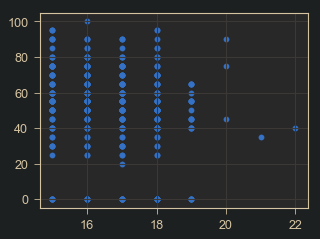

In [38]:
plt.scatter(x['age'], raw['M3'])

In [12]:
# x['age'].value_counts()

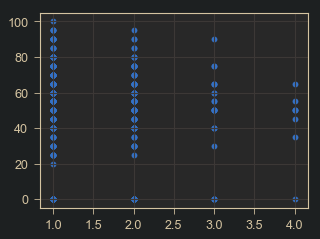

In [37]:
plt.scatter(x["traveltime"], raw['M3'])

In [45]:
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='gruvboxd')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='notebook', fscale=1.4, spines=True, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=True)

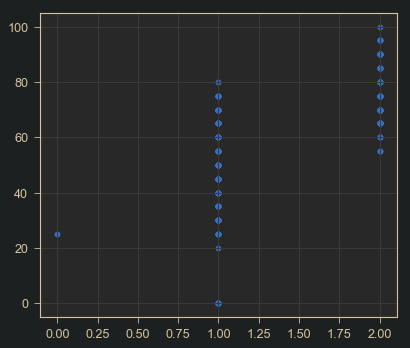

In [46]:
plt.scatter(x['M1'], raw['M3'])

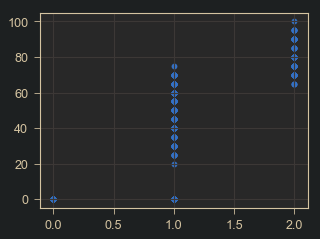

In [36]:
plt.scatter(x['M2'], raw['M3'])

In [80]:
raw.head()

,sex,age,address,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,activities,higher,health,absences,M1,M2,M3
0,F,18,U,4,4,at_home,teacher,2,2,0,no,yes,3,6,25,30,30
1,F,17,U,1,1,at_home,other,1,2,0,no,yes,3,4,25,25,30
2,F,15,U,1,1,at_home,other,1,2,3,no,yes,3,10,35,40,50
3,F,15,U,4,2,health,services,1,3,0,yes,yes,5,2,75,70,75
4,F,16,U,3,3,other,other,1,2,0,no,yes,5,4,30,50,50


In [97]:
raw["MAVG"] = (raw["M1"] + raw["M2"] + raw["M3"]) / 3

In [98]:
raw.head()

,sex,age,address,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,activities,higher,health,absences,M1,M2,M3,MAVG
0,F,18,U,4,4,at_home,teacher,2,2,0,no,yes,3,6,25,30,30,28.333333
1,F,17,U,1,1,at_home,other,1,2,0,no,yes,3,4,25,25,30,26.666667
2,F,15,U,1,1,at_home,other,1,2,3,no,yes,3,10,35,40,50,41.666667
3,F,15,U,4,2,health,services,1,3,0,yes,yes,5,2,75,70,75,73.333333
4,F,16,U,3,3,other,other,1,2,0,no,yes,5,4,30,50,50,43.333333


In [102]:
def func(row):
    if row['MAVG'] < 20:
        return "poor"
    elif 20<=row['MAVG']<70:
        return "intermediate"
    else:
        return "intelligent"

raw["level"] = raw.apply(lambda row: func(row), axis=1)
raw1 = raw.drop(['MAVG'], axis=1)

In [103]:
raw1.head()

,sex,age,address,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,activities,higher,health,absences,M1,M2,M3,level
0,F,18,U,4,4,at_home,teacher,2,2,0,no,yes,3,6,25,30,30,intermediate
1,F,17,U,1,1,at_home,other,1,2,0,no,yes,3,4,25,25,30,intermediate
2,F,15,U,1,1,at_home,other,1,2,3,no,yes,3,10,35,40,50,intermediate
3,F,15,U,4,2,health,services,1,3,0,yes,yes,5,2,75,70,75,intelligent
4,F,16,U,3,3,other,other,1,2,0,no,yes,5,4,30,50,50,intermediate


In [123]:
from sklearn.preprocessing import LabelBinarizer

transformed_data = pd.get_dummies(raw, columns=one_hot_cat)
x = transformed_data.drop('level', axis=1)
y = LabelBinarizer().fit_transform(transformed_data['level'])
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(30,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3,  activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=10, verbose=1)

# result = model.evaluate(x_test, y_test)
print(result)

Epoch 1/20
296/296 [==============================] - 2s 5ms/step - loss: 1.0454 - acc: 0.6858
Epoch 2/20
296/296 [==============================] - 0s 701us/step - loss: 0.3364 - acc: 0.8784
Epoch 3/20
296/296 [==============================] - 0s 687us/step - loss: 0.2379 - acc: 0.9257
Epoch 4/20
296/296 [==============================] - 0s 690us/step - loss: 0.1873 - acc: 0.9426
Epoch 5/20
296/296 [==============================] - 0s 646us/step - loss: 0.2311 - acc: 0.8885
Epoch 6/20
296/296 [==============================] - 0s 747us/step - loss: 0.2079 - acc: 0.9054
Epoch 7/20
296/296 [==============================] - 0s 775us/step - loss: 0.1685 - acc: 0.9291
Epoch 8/20
296/296 [==============================] - 0s 742us/step - loss: 0.1579 - acc: 0.9291
Epoch 9/20
296/296 [==============================] - 0s 576us/step - loss: 0.2015 - acc: 0.8986
Epoch 10/20
296/296 [==============================] - 0s 522us/step - loss: 0.1792 - acc: 0.9155
Epoch 11/20
296/296 [==========

In [116]:
y[3]

array([1, 0, 0])

In [35]:
print(1)

1


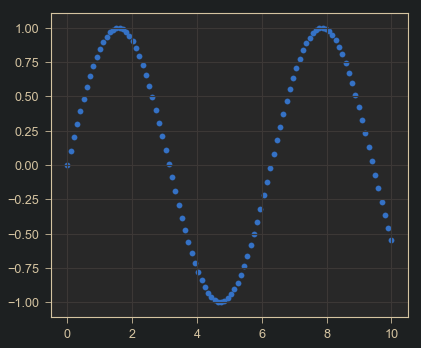

In [53]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.scatter(x, y)